In [125]:
#importing required Libraries
import pandas as pd
import numpy as np
import csv 
import random
import matplotlib.pyplot as plt
random.seed(1000001)


In [126]:
#Getting the data 
data_array = np.genfromtxt("cm_dataset_2 - cm_dataset.csv" , dtype = 'float64',delimiter=',',)
#Number of data points
Num_of_data_points = data_array.shape[0]
#Dimension of each data point
Dimension_of_data_point = data_array.shape[1]
#initialising the cluster
Cluster_type = np.full((Num_of_data_points) , 0)
''' # Change here for changing the number of cluster '''
Num_of_Clusters = 4 

#initialisation of the data points 
for i in range(Num_of_data_points):
    Cluster_type[i] = random.randint(0,Num_of_Clusters-1)

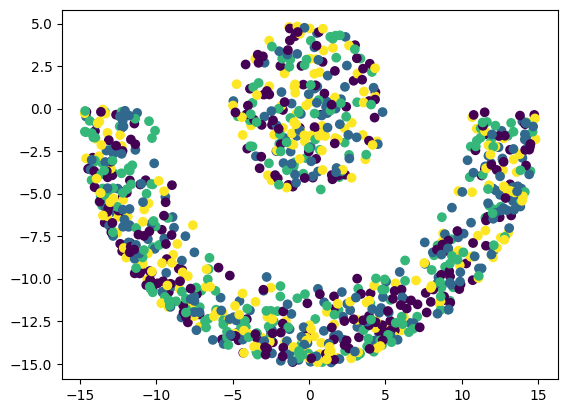

In [127]:


#Finding the initial mean and the number points in each cluster 
Mean_of_Clusters = np.full((Num_of_Clusters , Dimension_of_data_point) , 0 , dtype='float64')
Num_of_points_in_each_cluster = np.full((Num_of_Clusters), 0)
for i  in range(Num_of_data_points):
        Mean_of_Clusters[Cluster_type[i]] += data_array[i]
        Num_of_points_in_each_cluster[Cluster_type[i]] += 1

for i in range(Num_of_Clusters):
      Mean_of_Clusters[i] /= Num_of_points_in_each_cluster[i]

Prev_Cluster_type = np.full((Num_of_data_points) , 0)

#Plotting the initial randomised clusters 
colormap = np.array([0.1 , 0.2 , 0.3 ,0.4 , 0.5])
plt.scatter(data_array[:,0] , data_array[:,1], c = colormap[Cluster_type])
plt.show()

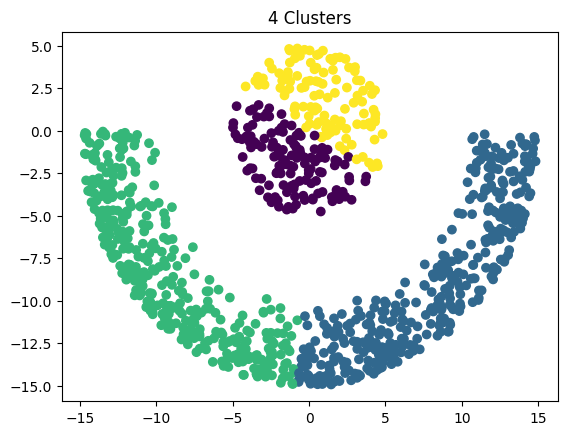

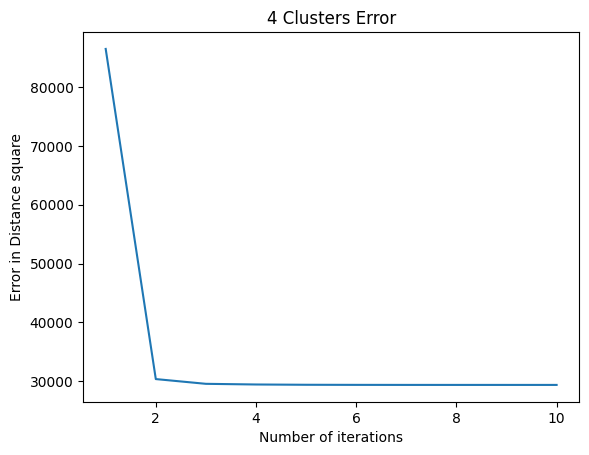

In [128]:
#list for having the irrors at each iteration 
Error = []
#number of iterations for k-means to converge 
Num_of_iterations = 0
while (True):
    Error_in_ith_iteration = 0
    Prev_Cluster_type = Cluster_type.copy()
    Num_of_iterations += 1 

    for i in range(Num_of_data_points):
        #Find the distance of the point from all means 
        Distance_square_from_mean = np.full((Num_of_Clusters),0.0 , dtype= 'float64')
        for j in range(Num_of_Clusters):
            Distance_square_from_mean[j] = np.sum(np.square((data_array[i] - Mean_of_Clusters[j]))) 
        #Error is the min out of the all the distance 
        Error_in_ith_iteration += Distance_square_from_mean.min()
        #Assign the new cluster to the minimum distance cluster
        Cluster_type[i] = np.argmin(Distance_square_from_mean)
    Error.append(Error_in_ith_iteration)

    #Finding the new mean and the number of points in each cluster 
    Mean_of_Clusters = np.full((Num_of_Clusters , Dimension_of_data_point) , 0.0 , dtype='float64')
    Num_of_points_in_each_cluster = np.full((Num_of_Clusters), 0)
    for i  in range(Num_of_data_points):
        Mean_of_Clusters[Cluster_type[i]] += data_array[i]
        Num_of_points_in_each_cluster[Cluster_type[i]] += 1
    for i in range(Num_of_Clusters):
        Mean_of_Clusters[i] /= Num_of_points_in_each_cluster[i]   
    ##Plotting the clusters 
    #plt.scatter(data_array[:,0] , data_array[:,1], c = colormap[Cluster_type])
    #plt.show()

    '''#for i in range(Num_of_Clusters ):
    #    if(Num_of_points_in_each_cluster[i] == 0):
    #        rand = random.randint(0, Num_of_data_points-1)
    #        if(Num_of_points_in_each_cluster[Cluster_type[rand]] > 2):
    #            Num_of_points_in_each_cluster[Cluster_type[rand]] += -1
    #            Mean_of_Clusters[Cluster_type[rand]] -= data_array[rand]
    #            Num_of_points_in_each_cluster[i] += 1
    #            Cluster_type[rand] = i'''

    #If the previous and the current cluster assignment are the same then the algorithm ends 
    if ((Prev_Cluster_type == Cluster_type).all()):
        break

plt.scatter(data_array[:,0] , data_array[:,1], c = colormap[Cluster_type])
plt.title(f"{Num_of_Clusters} Clusters")
plt.savefig(f"{Num_of_Clusters} Clusters")
plt.show()  

#Plotting the error function with respect to the Number of iteration
plt.plot( np.linspace(1 , Num_of_iterations , Num_of_iterations), np.array(Error) )
plt.ylabel("Error in Distance square")
plt.xlabel("Number of iterations")
plt.title(f"{Num_of_Clusters} Clusters Error")
plt.savefig(f"{Num_of_Clusters} Clusters Error")
plt.show()